In [2]:
import pandas as pd
import folium 

In [3]:
df = pd.read_csv('2019_nC0v_20200121_20200126_cleaned.csv', sep=',')
capitals = pd.read_csv('concap.csv', sep=',')

In [4]:
df = df.drop(columns= ['Unnamed: 0'])

In [5]:
empty = df[df['Province/State']=='0']
notempty = df[df['Province/State']!='0']

In [6]:
empty = empty.groupby('Country',as_index= False).agg(sum)

In [7]:
empty['Province/State'] = empty['Country'].map(capitals.set_index('CountryName')['CapitalName'])

In [8]:
df3 = pd.concat([notempty, empty], sort=False)

In [9]:
df3['Country'][df3['Country']=='Mainland China'] = 'China'
df3['Lat'] = df3['Country'].map(capitals.set_index('CountryName')['CapitalLatitude'])
df3['Lon'] = df3['Country'].map(capitals.set_index('CountryName')['CapitalLongitude'])

C:\Users\dajno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
my_map3 = folium.Map(zoom_start = 15,tiles='cartodbdark_matter') 

for i in range(0,len(df3)):
    folium.Marker([df3.iloc[i]['Lat'], df3.iloc[i]['Lon']],fill_color='red', color='grey', fill_opacity=0.7).add_to(my_map3)
my_map3

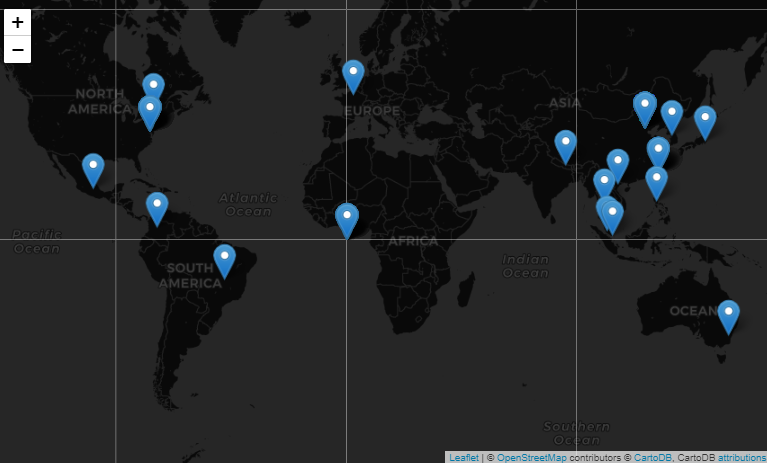

In [16]:
from IPython.display import Image
Image(filename= "map.png")